# Sample notebook showcasing R on Jupyter

An overview of some plotting controls available in R for visualizing networks and visualizing tree models.

To execute a cell, select it and then use **[Shift] + [Enter]**.

In [1]:
# Default plot size is 7 inches x 7 inches; change to 7 x 3
options(repr.plot.height=3)

In [ ]:
library(rpart)  # CART tree models
library(rpart.plot)  # Pretty plotting
library(vcd)  # Spline plotting

In [3]:
titanic <- as.data.frame(Titanic)
head(titanic, n=5)
summary(titanic)

,Class,Sex,Age,Survived,Freq
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0


  Class       Sex        Age     Survived      Freq       
 1st :8   Male  :16   Child:16   No :16   Min.   :  0.00  
 2nd :8   Female:16   Adult:16   Yes:16   1st Qu.:  0.75  
 3rd :8                                   Median : 13.50  
 Crew:8                                   Mean   : 68.78  
                                          3rd Qu.: 77.00  
                                          Max.   :670.00  

## Data visualization

Before making the tree models, try some visualization.

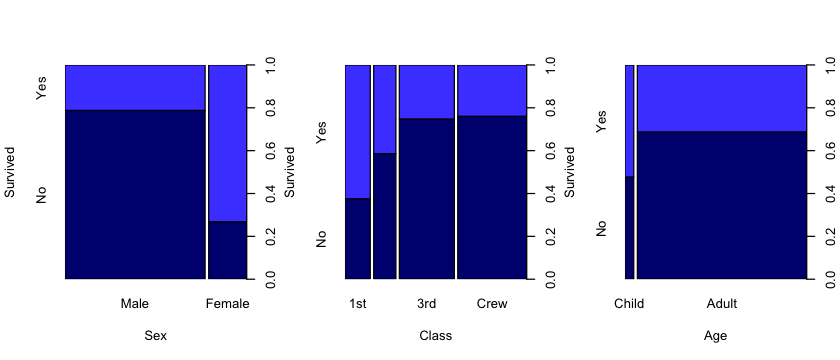

In [4]:
Survival.by.Sex <- xtabs(Freq~Sex+Survived, data=titanic)
Survival.by.Class <- xtabs(Freq~Class+Survived, data=titanic)
Survival.by.Age <- xtabs(Freq~Age+Survived, data=titanic)

oldpar <- par(mfrow=c(1,3))
options(repr.plot.width=7)
spineplot(Survival.by.Sex, col=c(rgb(0, 0, 0.5), rgb(0.3, 0.3, 1)))
spineplot(Survival.by.Class, col=c(rgb(0, 0, 0.5), rgb(0.3, 0.3, 1)))
spineplot(Survival.by.Age, col=c(rgb(0, 0, 0.5), rgb(0.3, 0.3, 1)))
par(oldpar)

In [ ]:
cart.control <- rpart.control(minbucket=1, cp=0, maxdepth=5)

model.cart = rpart(
    Survived ~ . , 
    data=titanic[ , -5],
    weights=titanic$Freq,
    method="class",
    #xval=10,
    control=cart.control
)

print(model.cart)
printcp(model.cart)

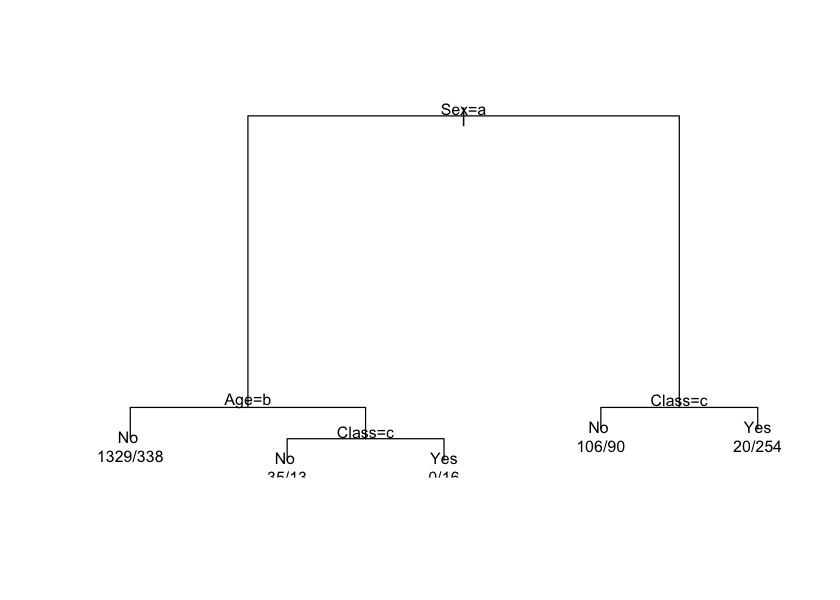

In [6]:
# The standard Tree plot
plot(model.cart, margin=0.01)
text(model.cart, use.n=TRUE, cex=.8)
options(repr.plot.height=5)

cex 1   xlim c(0, 1)   ylim c(-0.6, 1.6)


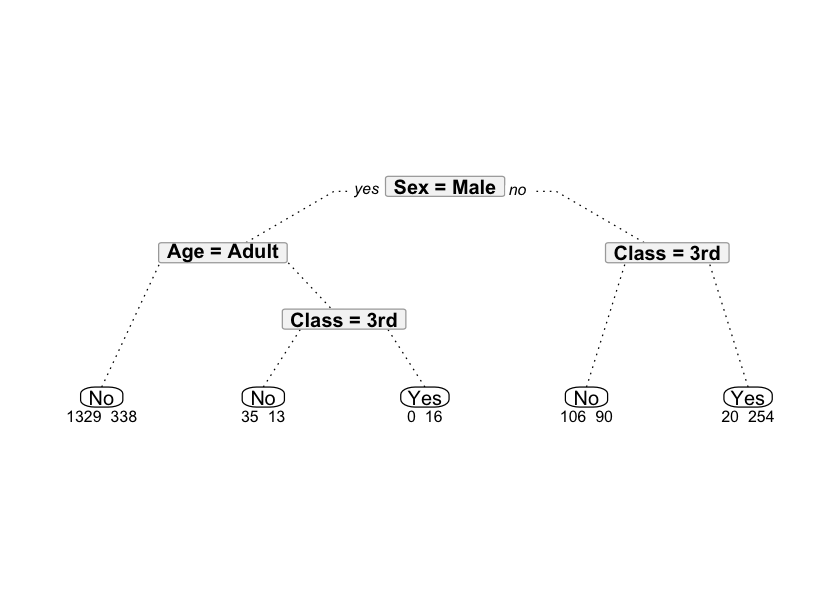

In [7]:
# Better visualization using rpart.plot
prp(x=model.cart,
    fallen.leaves=TRUE, branch=.5, faclen=0, trace=1,
    extra=1, under=TRUE,
    branch.lty=3,
    split.box.col="whitesmoke", split.border.col="darkgray", split.round=0.4)

In [8]:
# Confusion Matrix given a cutoff
threshold = 0.8
cm <- table(titanic$Survived,
            predict(model.cart, titanic[,-5], type="prob")[,2] > threshold)
print(cm)

     
      FALSE TRUE
  No      7    9
  Yes     7    9


# For fun, let's make a Caffeine molecule

This notebook also demonstrates importing an extra library, `igraph`.
The Docker container sets this up, without the student needing to import anything
(grep for igraph).

We'll use an adjacency matrix to describe the network topology of Caffeine, and create the graph
using `graph.adjacency(<the-adjacency-matrix>)` to demonstrate some standard selection and
plotting functions using R's `igraph` library. The chemical formula below demonstrates use of inline LaTeX math markup, and the image inline image placement.

$$C_8H_{10}N_4O_2$$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Koffein_-_Caffeine.svg/220px-Koffein_-_Caffeine.svg.png" alt="Caffeine molecule"></img>

[mybinder]: http://mybinder.org

In [ ]:
library(igraph)

In [10]:
caffeine.adjacency <- as.matrix(read.table("caffeine.txt", sep=" "))
caffeine <- graph.adjacency(caffeine.adjacency, mode='undirected')

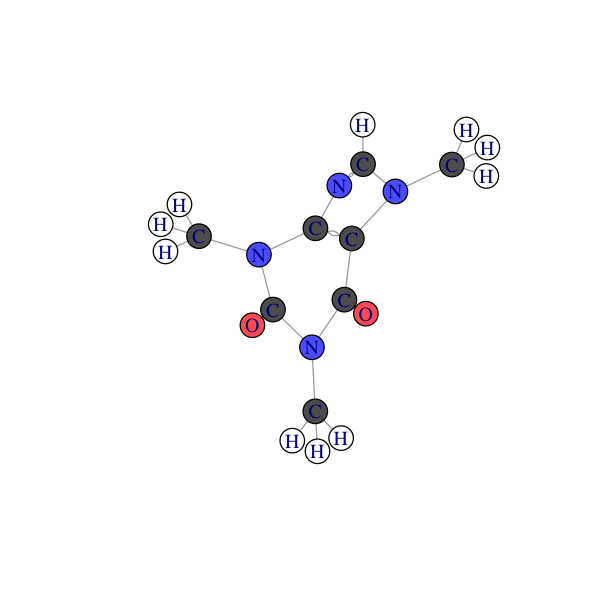

In [11]:
V(caffeine)$name <- strsplit('CHHHNCOCNCHHHCHNCNCHHHCO', '')[[1]]
V(caffeine)$color <- rgb(1, 1, 1)
V(caffeine)[name == 'C']$color <- rgb(0, 0, 0, 0.7)
V(caffeine)[name == 'O']$color <- rgb(1, 0, 0, 0.7)
V(caffeine)[name == 'N']$color <- rgb(0, 0, 1, 0.7)

plot(caffeine)
options(repr.plot.height=5, repr.plot.width=5)